## Import Data

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join('datasets', 'CarPrice_Assignment.csv')
cars = pd.read_csv(data_path)

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Seems like we don't have null values in dataset

## Data Cleaning

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cars = cars.drop('car_ID', axis=1)

In [8]:
cars['CarName'] = cars['CarName'].str.split(' ', expand=True)

In [9]:
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
cars['CarName'] = cars['CarName'].replace({'maxda': 'mazda',
                                           'Nissan': 'nissan',
                                           'porcshce': 'porsche',
                                           'vokswagen': 'volkswagen',
                                           'vw': 'volkswagen',
                                           'toyouta': 'toyota'
                                          })

In [11]:
cars['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [12]:
cars['doornumber'] = cars['doornumber'].replace({'two': 2, 'four': 4})

In [13]:
cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
cars['cylindernumber'] = cars['cylindernumber'].replace({'four': 4,
                                                         'six': 6,
                                                         'five': 5,
                                                         'three': 3,
                                                         'twelve': 12,
                                                         'two': 2,
                                                         'eight': 8
                                                        })

In [15]:
cat_col = cars.select_dtypes(include=['object']).columns
num_col = cars.select_dtypes(exclude=['object']).columns

## Data Visualization

Text(0, 0.5, 'Count of Cars')

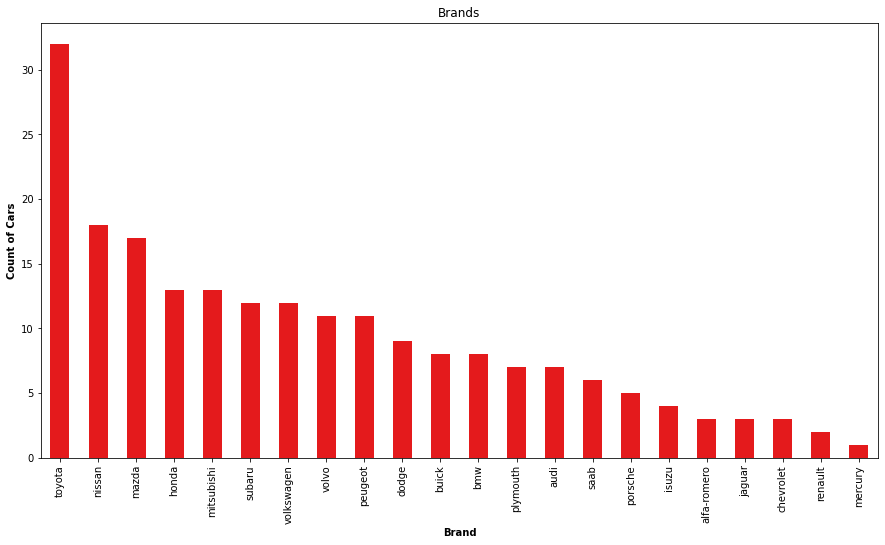

In [16]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = cars['CarName'].value_counts().plot(kind='bar', stacked=True, colormap='Set1')
ax.title.set_text('Brands')
plt.xlabel('Brand', fontweight='bold')
plt.ylabel('Count of Cars', fontweight='bold')

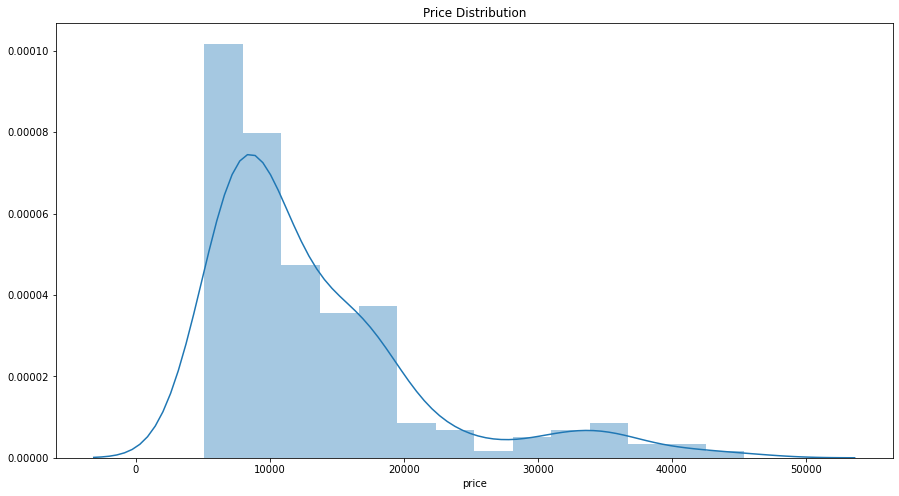

In [17]:
plt.figure(figsize=(15,8))
plt.title('Price Distribution')
sns.distplot(cars['price'])

### Visualising Numeric Variables

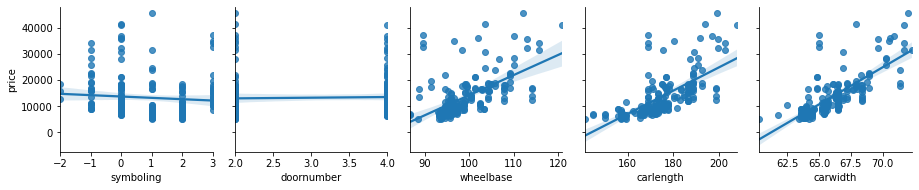

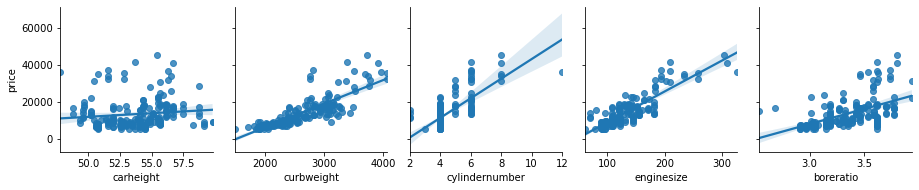

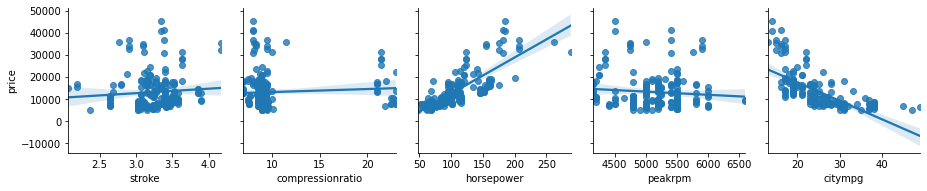

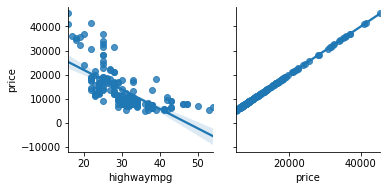

In [18]:
for i in range(0,4):
    batch=5*i
    sns.pairplot(
        data=cars,
        y_vars=['price'],
        x_vars=num_col[0+batch:5+batch],
        kind="reg"
    )

In [19]:
corr = cars[num_col].corr()
corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

enginesize, curbweight, horsepower, carwidth, cylindernumber, carlength, wheelbase, boreratio have a positive correlation

citympg and highwaympg have negative correlation

num_col_rel = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber', 'carlength', 'wheelbase', 'boreratio', 'price']
num_col_rel

### Visualising Categorical Variables

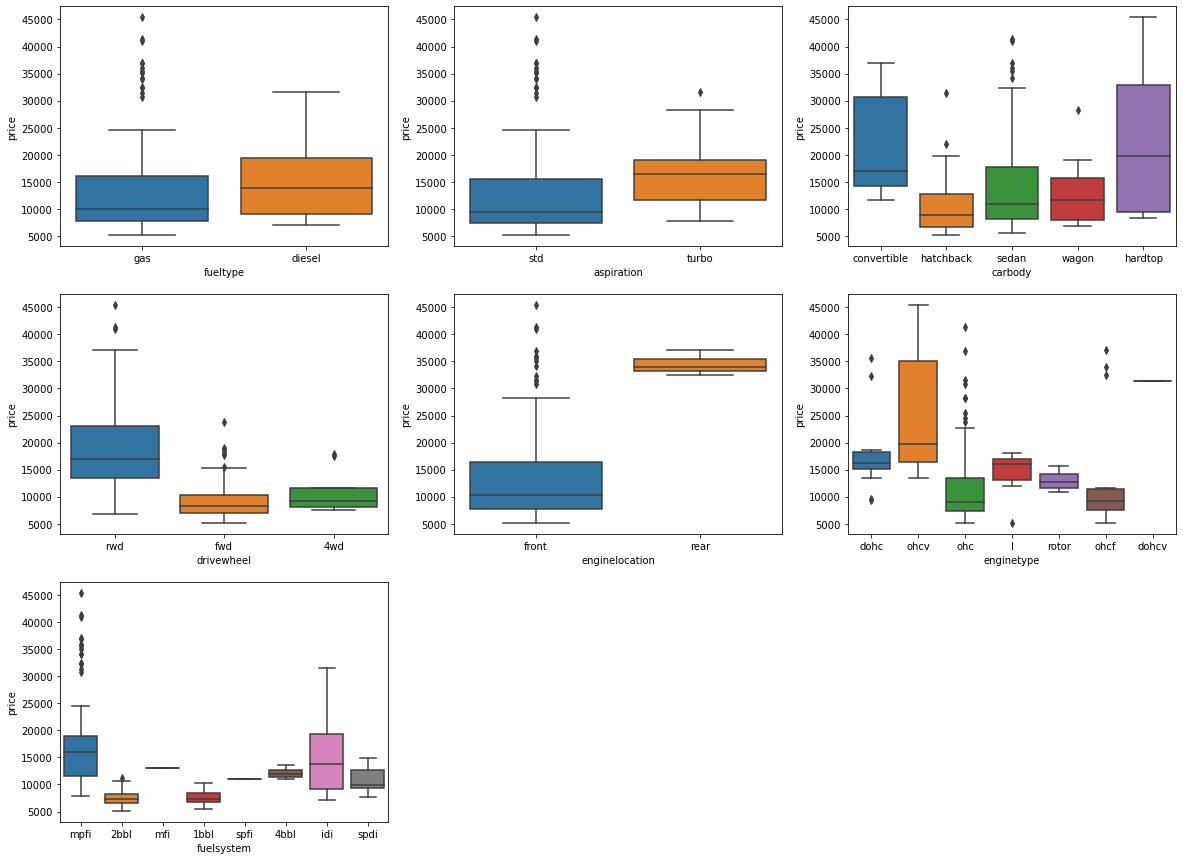

In [20]:
plt.figure(figsize=(20,15))

for i in range(1, len(cat_col)):
    plt.subplot(3,3,i)
    sns.boxplot(data=cars, x=cat_col[i], y='price')
    
plt.show()

Seems all categorical values impact in price

num_col_rel.extend(cat_col)
columns = num_col_rel
columns

cars = cars[columns]

## Create Sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

## Prepare Data

In [23]:
train_set.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
66,0,mazda,diesel,std,4,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
111,0,peugeot,gas,std,4,sedan,rwd,front,107.9,186.7,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
153,0,toyota,gas,std,4,wagon,fwd,front,95.7,169.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
96,1,nissan,gas,std,4,sedan,fwd,front,94.5,165.3,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
38,0,honda,gas,std,2,hatchback,fwd,front,96.5,167.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0


In [24]:
cars_data = train_set.drop('price', axis=1)
cars_label = train_set['price']

In [25]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,0,mazda,diesel,std,4,sedan,rwd,front,104.9,175.0,...,4,134,idi,3.43,3.64,22.0,72,4200,31,39
111,0,peugeot,gas,std,4,sedan,rwd,front,107.9,186.7,...,4,120,mpfi,3.46,2.19,8.4,95,5000,19,24
153,0,toyota,gas,std,4,wagon,fwd,front,95.7,169.7,...,4,92,2bbl,3.05,3.03,9.0,62,4800,31,37
96,1,nissan,gas,std,4,sedan,fwd,front,94.5,165.3,...,4,97,2bbl,3.15,3.29,9.4,69,5200,31,37
38,0,honda,gas,std,2,hatchback,fwd,front,96.5,167.5,...,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33


In [26]:
cars_label.head()

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
Name: price, dtype: float64

### Pipelines

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
cat_col = cars_data.select_dtypes(include=['object']).columns
num_col = cars_data.select_dtypes(exclude=['object']).columns

In [29]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [30]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_col),
    ('cat', OneHotEncoder(drop='first'), cat_col)
])

In [31]:
cars_prepared = full_pipeline.fit_transform(cars_data)

## Select and Train a Model

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
test_data = test_set.drop('price', axis=1)
test_prepared = full_pipeline.transform(test_data)
test_labels = test_set['price']

In [34]:
def display_scores(model):
    scores = cross_val_score(model, test_prepared, test_labels, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    print('Scores:', rmse_scores)
    print('Mean:', rmse_scores.mean())
    print('Standard deviation:', rmse_scores.std())
    
    predictions = model.predict(test_prepared)
    print('Mean square error:', mean_squared_error(test_labels, predictions))
    print('R square score:', r2_score(test_labels, predictions))

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_label)

LinearRegression()

In [37]:
display_scores(lin_reg)

Scores: [ 8409.91645219  8235.32743549 13757.41038207 15800.3668465
 11857.29784949 15353.84871827  4232.70063831  9852.20556062
 10119.26523639  5048.85126502]
Mean: 10266.719038434254
Standard deviation: 3776.4847059620415
Mean square error: 9.894018055393529e+30
R square score: -1.2532954294886978e+23


### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, cars_label)

RandomForestRegressor()

In [40]:
display_scores(forest_reg)

Scores: [3890.39152687  589.00609057 2398.33816743 5119.23499933 1380.92117504
 4533.74136028 7185.54430883 2495.85289474 2191.73445367 1341.54172828]
Mean: 3112.630670504413
Standard deviation: 1936.0394434327352
Mean square error: 3210735.6616476197
R square score: 0.9593289570777999


### Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = [
    {'n_estimators': np.arange(10, 100, 10), 'max_features': np.arange(2, 50, 5)},
    {'bootstrap': [False], 'n_estimators': np.arange(10, 100, 10), 'max_features': np.arange(2, 50, 5)}
]

forest_reg_grid = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg_grid, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

In [43]:
grid_search.fit(cars_prepared, cars_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47]),
                          'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                         {'bootstrap': [False],
                          'max_features': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47]),
                          'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=7, n_estimators=40)

In [45]:
forest_best_estimator = grid_search.best_estimator_

In [46]:
display_scores(forest_best_estimator)

Scores: [1448.83527389  519.78188037 2520.31453836 4095.6445854  1281.002684
 2641.06117983 5752.20941484 1962.38955896 2564.68045246 1527.86126624]
Mean: 2431.378083435612
Standard deviation: 1443.8350593996768
Mean square error: 6165392.567806591
R square score: 0.9219017159360919


## Conclusion

The best model I can choose is the RandomForestRegressor founded in GridSearchCV. Even when the previous model has better "R square score", the "Standard deviation" is a significative less.